# Basic Algorithms

In [1]:
#!pip install pandas==0.24.2
#!pip install --user pandas_ml==0.6.1
#downgrade matplotlib to bypass issue with confuson matrix being chopped out
#!pip install matplotlib==3.1.0
#!pip install seaborn
#!pip install pydot
#!pip install graphviz

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

import pandas as pd, numpy as np
import sys
import io

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot


In [3]:
df_pd = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/predict_home_value.csv")

df_pd.sample(5)

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
837,838,1680,Twnhs,2Story,5,1973,Gable,TA,CBlock,TA,...,Detchd,Unf,1,TA,0,NaN,NaN,11,2008,100000
1294,1295,8172,1Fam,1Story,7,1955,Hip,TA,CBlock,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,4,2006,115000
508,509,9600,1Fam,2Story,9,1928,Gambrel,Ex,BrkTil,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,10,2008,161000
488,489,10800,2fmCon,1.5Fin,4,1900,Gable,Fa,CBlock,Fa,...,Attchd,Unf,2,Fa,0,NaN,NaN,5,2006,160000
560,561,11341,1Fam,1Story,6,1957,Hip,TA,CBlock,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,5,2010,121500


In [4]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1460 non-null   int64 
 1   LOTAREA       1460 non-null   int64 
 2   BLDGTYPE      1460 non-null   object
 3   HOUSESTYLE    1460 non-null   object
 4   OVERALLCOND   1460 non-null   int64 
 5   YEARBUILT     1460 non-null   int64 
 6   ROOFSTYLE     1460 non-null   object
 7   EXTERCOND     1460 non-null   object
 8   FOUNDATION    1460 non-null   object
 9   BSMTCOND      1423 non-null   object
 10  HEATING       1460 non-null   object
 11  HEATINGQC     1460 non-null   object
 12  CENTRALAIR    1460 non-null   object
 13  ELECTRICAL    1459 non-null   object
 14  FULLBATH      1460 non-null   int64 
 15  HALFBATH      1460 non-null   int64 
 16  BEDROOMABVGR  1460 non-null   int64 
 17  KITCHENABVGR  1460 non-null   int64 
 18  KITCHENQUAL   1460 non-null   object
 19  TOTRMS

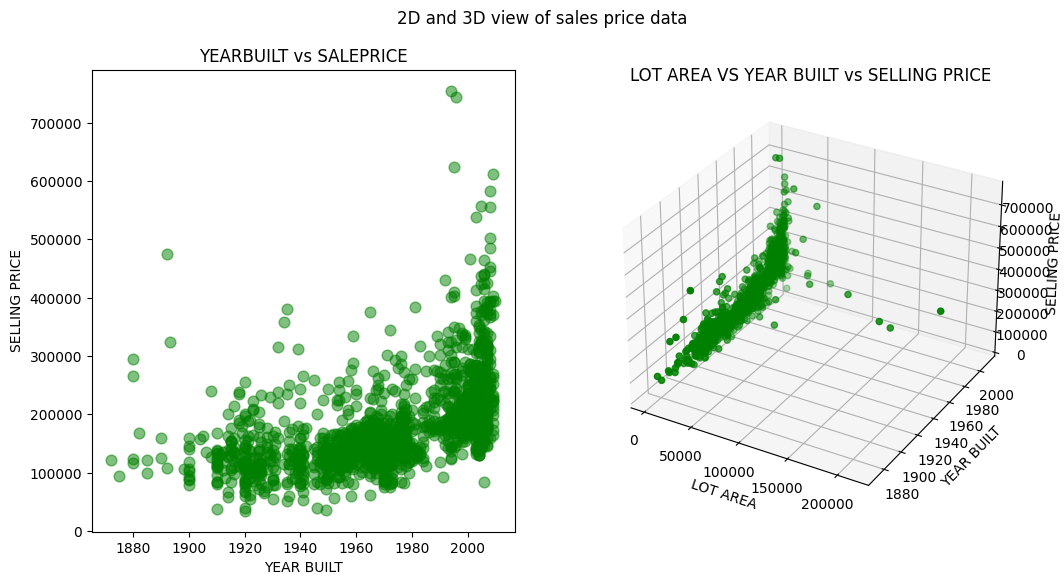

In [5]:
area = 60

x= df_pd['YEARBUILT']
y= df_pd['SALEPRICE']
z= df_pd['LOTAREA']

fig = plt.figure(figsize=(12, 6))
fig.suptitle('2D and 3D view of sales price data')

# 1st subPlot
ax = fig.add_subplot(1,2,1)

ax.scatter(x, y, alpha=0.5, color='green', s= area)
ax.set_xlabel('YEAR BUILT')
ax.set_ylabel('SELLING PRICE')

plt.title('YEARBUILT vs SALEPRICE')

# 2nd subPlot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, color='green', marker= 'o')

ax.set_xlabel('LOT AREA')
ax.set_ylabel('YEAR BUILT')
ax.set_zlabel('SELLING PRICE')

plt.title('LOT AREA VS YEAR BUILT vs SELLING PRICE')

plt.show()

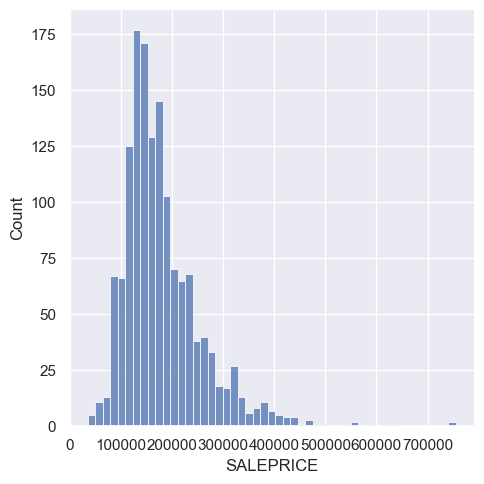

In [6]:
sns.set(rc={"figure.figsize" : (8, 4)}); np.random.seed(0)
ax = sns.displot(df_pd['SALEPRICE'])
plt.show();

In [7]:
print("The dataset contains the following number of records for each of the columns : \n" 
      + str(df_pd.count()))

The dataset contains the following number of records for each of the columns : 
ID              1460
LOTAREA         1460
BLDGTYPE        1460
HOUSESTYLE      1460
OVERALLCOND     1460
YEARBUILT       1460
ROOFSTYLE       1460
EXTERCOND       1460
FOUNDATION      1460
BSMTCOND        1423
HEATING         1460
HEATINGQC       1460
CENTRALAIR      1460
ELECTRICAL      1459
FULLBATH        1460
HALFBATH        1460
BEDROOMABVGR    1460
KITCHENABVGR    1460
KITCHENQUAL     1460
TOTRMSABVGRD    1460
FIREPLACES      1460
FIREPLACEQU      770
GARAGETYPE      1379
GARAGEFINISH    1379
GARAGECARS      1460
GARAGECOND      1379
POOLAREA        1460
POOLQC             7
FENCE            281
MOSOLD          1460
YRSOLD          1460
SALEPRICE       1460
dtype: int64


In [8]:
print("The dataset contains the following data type for each of the columns : \n" 
      + str(df_pd.dtypes))

The dataset contains the following data type for each of the columns : 
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


In [9]:
df_pd.isnull().any()

ID              False
LOTAREA         False
BLDGTYPE        False
HOUSESTYLE      False
OVERALLCOND     False
YEARBUILT       False
ROOFSTYLE       False
EXTERCOND       False
FOUNDATION      False
BSMTCOND         True
HEATING         False
HEATINGQC       False
CENTRALAIR      False
ELECTRICAL       True
FULLBATH        False
HALFBATH        False
BEDROOMABVGR    False
KITCHENABVGR    False
KITCHENQUAL     False
TOTRMSABVGRD    False
FIREPLACES      False
FIREPLACEQU      True
GARAGETYPE       True
GARAGEFINISH     True
GARAGECARS      False
GARAGECOND       True
POOLAREA        False
POOLQC           True
FENCE            True
MOSOLD          False
YRSOLD          False
SALEPRICE       False
dtype: bool

## Data preperation

During this process, we identify categorical columns in the dataset. Categories need to be indexed, which means the string labels are converted to label indices. These label indices are encoded using One-hot encoding to a binary vector with at most a single value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features to use categorical features.

In [10]:
#remove columns that are not required
df_pd = df_pd.drop(['ID'], axis=1)
df_pd.head(3)

,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,HEATING,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500


In [11]:
# Defining the categorical columns 
categoricalColumns = df_pd.select_dtypes(include=[object]).columns

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")

onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
Index(['BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION',
       'BSMTCOND', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL',
       'KITCHENQUAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH',
       'GARAGECOND', 'POOLQC', 'FENCE'],
      dtype='object')


In [12]:
# Defining the numerical columns
numericalColumns = [col for col in df_pd.select_dtypes(
    include=[np.float64,np.int64]).columns if col not in ['SALEPRICE']]

print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()
numerical_transformer = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns : 
['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD']


In [13]:
preprocessorForCategoricalColumns = ColumnTransformer(
    transformers=[('cat', categorical_transformer,
                   categoricalColumns)],remainder="passthrough")

preprocessorForAllColumns = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categoricalColumns),
                  ('num',numerical_transformer,numericalColumns)],remainder="passthrough")


# The transformation happens in the pipeline. Temporarily done here to show what intermediate value looks like.
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp)

df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp_2)

Data after transforming :
[[1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.00800e+03
  2.08500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.00700e+03
  1.81500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.00800e+03
  2.23500e+05]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.01000e+03
  2.66500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 4.00000e+00 2.01000e+03
  1.42125e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 6.00000e+00 2.00800e+03
  1.47500e+05]]
Data after transforming :
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.59911110e+00
   1.38777489e-01  2.08500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
  -6.14438622e-01  1.81500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.90891347e-01
   1.38777489e-01  2.23500000e+05]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
   1.64520971e+00  2.66500000e+05]
 [ 1.00000000e+00  0.00000000e+

In [14]:
# prepare dataframe for splitting data into train and test datasets

features = []
features = df_pd.drop(['SALEPRICE'], axis=1)

label = pd.DataFrame(df_pd, columns = ['SALEPRICE'])
label_encoder = LabelEncoder()
label = df_pd['SALEPRICE']

label = label_encoder.fit_transform(label)
print(" value of label : "+ str(label))

 value of label : [412 339 442 ... 527 199 221]


### Split data into test and train

Scikit-learn provides in built API to split the original dataset into train and test datasets. random_state is set to a number to be able to reproduce the same data split combination through multiple runs.

In [15]:
X = features['YEARBUILT'].values.reshape(-1,1)

X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X,label , random_state=0)


print("Dimensions of datasets that will be used for training : Input features"+
      str(X_train_slr.shape)+" Output label" + str(y_train_slr.shape))

print("Dimensions of datasets that will be used for testing : Input features"+
      str(X_test_slr.shape)+" Output label" + str(y_test_slr.shape))

Dimensions of datasets that will be used for training : Input features(1095, 1) Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 1) Output label(365,)


#### regression model

In [16]:
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regresstion'

slRegressor = LinearRegression()
slRegressor.fit(X_train_slr, y_train_slr)

y_pred_slr = slRegressor.predict(X_test_slr)
print(slRegressor)


LinearRegression()


In [18]:
print('intercept: \n', slRegressor.intercept_)
print('Coefficients: \n', slRegressor.coef_)

intercept: 
 -6405.63141811035
Coefficients: 
 [3.3986098]


In [19]:
def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()
    

def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

def two_vs_three(x_test,y_test,y_pred,z=None, isLinear = False) : 
    
    area = 60
    

    fig = plt.figure(figsize=(12,6))
    fig.suptitle('2D and 3D view of sales price data')

    # First subplot
    ax = fig.add_subplot(1, 2,1)
    ax.scatter(x_test, y_test, alpha=0.5,color='blue', s= area)
    ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel('YEAR BUILT')
    ax.set_ylabel('SELLING PRICE')
    
    plt.title('YEARBUILT vs SALEPRICE')
    
    if not isLinear : 
    # Second subplot
        ax = fig.add_subplot(1,2,2, projection='3d')

        ax.scatter(z, x_test, y_test, color='blue', marker='o')
        ax.plot(z, x_test, y_pred, alpha=0.9,color='red', linewidth=2)
        ax.set_ylabel('YEAR BUILT')
        ax.set_zlabel('SELLING PRICE')
        ax.set_xlabel('LOT AREA')

    plt.title('LOT AREA vs YEAR BUILT vs SELLING PRICE')

    plt.show()

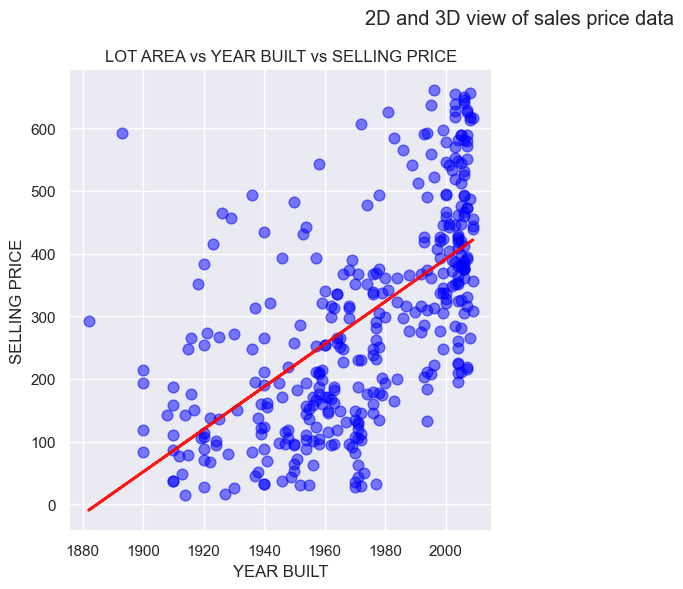

In [20]:
two_vs_three(X_test_slr[:,0],y_test_slr, y_pred_slr, None, True)

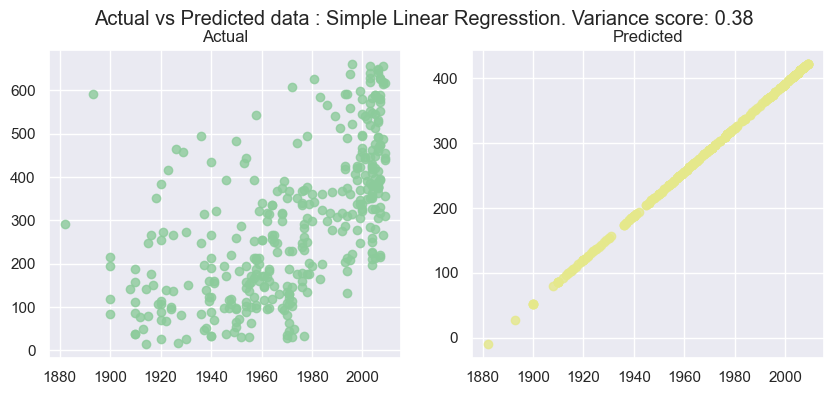

In [22]:
two_d_compare(X_test_slr, y_test_slr, y_pred_slr, model_name)

In [22]:
slrMetrics = model_metrics(slRegressor, y_test_slr, y_pred_slr)